In [1]:
import math
import numpy as np
import tensorflow as tf
import PIL
from pathlib import Path
import matplotlib.pyplot as plt

random_state = 42

In [2]:
from tensorflow.python.client import device_lib 

print(tf.__version__)
# check if GPU is available
print(device_lib.list_local_devices())

2.0.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6842011674353425039
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6618563871
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13391723525839305571
physical_device_desc: "device: 0, name: GeForce RTX 2060 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
data_path = Path("F:\Workspace\shrec19retrieval\data")
do_train = True

In [4]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
    data_path / "query" / "train", 
    target_size=(224, 224),
    seed=random_state)
valid_gen = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
    data_path / "query" / "val", 
    target_size=(224, 224),
    seed=random_state)

Found 8400 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

base_model = tf.keras.applications.resnet50.ResNet50(
    include_top=False, 
    pooling='avg')
x = base_model.output
predictions = Dense(21, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [6]:
batch_size = 32
train_len = 8400
valid_len = 2100
n_epochs = 2
history = None

In [7]:
if not do_train:
    model.load_weights('model_2epoch.h5')
else:
    history = model.fit(
        x=train_gen,
        steps_per_epoch=train_len // batch_size,
        epochs=n_epochs,
        verbose=2,
        validation_data=valid_gen,
        validation_steps=valid_len // batch_size,
    )
    
    model.save('model_2epoch.h5')

Train for 262 steps, validate for 65 steps
Epoch 1/2
262/262 - 102s - loss: 0.7237 - accuracy: 0.7903 - val_loss: 0.4338 - val_accuracy: 0.8649
Epoch 2/2
262/262 - 63s - loss: 0.2743 - accuracy: 0.9165 - val_loss: 0.4450 - val_accuracy: 0.8663


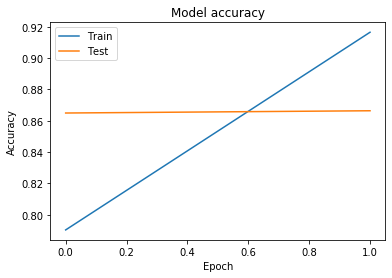

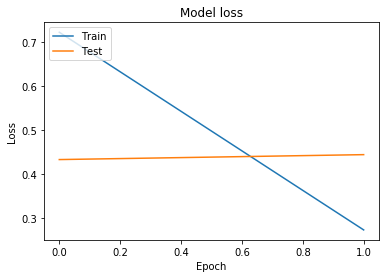

In [8]:
if history is not None:
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()